In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from copy import deepcopy
import seaborn as sns


% matplotlib inline

In [2]:
df_raw = pd.read_csv('sm_flights.csv')
df_raw.drop('Unnamed: 0',axis =1, inplace = True)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12188 entries, 0 to 12187
Data columns (total 32 columns):
Flight#              12188 non-null object
Taxi(min)            12188 non-null float64
Taxi_Arr(min)        12188 non-null float64
Speed(mph)           12188 non-null float64
Altitute(ft)         12188 non-null float64
Act_Dist(mi)         12188 non-null float64
Sch_Dist(mi)         12188 non-null float64
Act_Dur              12188 non-null float64
Sch_Dur              12188 non-null float64
Dep_Hr               12188 non-null float64
DOW                  12188 non-null int64
ORI_rank             12188 non-null int64
DES_rank             12188 non-null int64
Delay_Dep            12188 non-null float64
Delay_Arr            12188 non-null float64
Airline              12188 non-null object
AAL                  12188 non-null int64
DAL                  12188 non-null int64
UAL                  12188 non-null int64
SWA                  12188 non-null int64
JBU                  12188 

In [4]:
df_raw.head()

,Flight#,Taxi(min),Taxi_Arr(min),Speed(mph),Altitute(ft),Act_Dist(mi),Sch_Dist(mi),Act_Dur,Sch_Dur,Dep_Hr,...,Airline_Avg_Delay,Mon,Tue,Wed,Thu,Fri,Sat,DOW_avg_delay,TOD_temp,TOD_tree
0,N2437,18.761282,9.222338,587.0,45000.0,1565.0,1662.0,153.0,151.0,16.000000,...,0.0,0,0,1,0,0,0,1,16,0
1,UAL1450,17.000000,24.000000,517.0,37000.0,1833.0,1844.0,245.0,254.0,9.383333,...,2.0,0,0,0,0,1,0,4,9,0
2,UAL1450,25.000000,11.000000,519.0,37000.0,1846.0,1788.0,241.0,254.0,9.500000,...,2.0,0,0,0,1,0,0,2,9,0
3,UAL1450,15.000000,15.000000,521.0,35000.0,1900.0,1892.0,236.0,254.0,9.566667,...,2.0,0,0,1,0,0,0,1,9,0
4,UAL1450,16.000000,10.000000,520.0,35000.0,1865.0,1743.0,230.0,254.0,9.150000,...,2.0,0,1,0,0,0,0,6,9,0


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12188 entries, 0 to 12187
Data columns (total 32 columns):
Flight#              12188 non-null object
Taxi(min)            12188 non-null float64
Taxi_Arr(min)        12188 non-null float64
Speed(mph)           12188 non-null float64
Altitute(ft)         12188 non-null float64
Act_Dist(mi)         12188 non-null float64
Sch_Dist(mi)         12188 non-null float64
Act_Dur              12188 non-null float64
Sch_Dur              12188 non-null float64
Dep_Hr               12188 non-null float64
DOW                  12188 non-null int64
ORI_rank             12188 non-null int64
DES_rank             12188 non-null int64
Delay_Dep            12188 non-null float64
Delay_Arr            12188 non-null float64
Airline              12188 non-null object
AAL                  12188 non-null int64
DAL                  12188 non-null int64
UAL                  12188 non-null int64
SWA                  12188 non-null int64
JBU                  12188 

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

/Users/Chuoran/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
list(zip(range(len(df_raw.columns)),df_raw.columns))

[(0, 'Flight#'),
 (1, 'Taxi(min)'),
 (2, 'Taxi_Arr(min)'),
 (3, 'Speed(mph)'),
 (4, 'Altitute(ft)'),
 (5, 'Act_Dist(mi)'),
 (6, 'Sch_Dist(mi)'),
 (7, 'Act_Dur'),
 (8, 'Sch_Dur'),
 (9, 'Dep_Hr'),
 (10, 'DOW'),
 (11, 'ORI_rank'),
 (12, 'DES_rank'),
 (13, 'Delay_Dep'),
 (14, 'Delay_Arr'),
 (15, 'Airline'),
 (16, 'AAL'),
 (17, 'DAL'),
 (18, 'UAL'),
 (19, 'SWA'),
 (20, 'JBU'),
 (21, 'VRD'),
 (22, 'Airline_Avg_Delay'),
 (23, 'Mon'),
 (24, 'Tue'),
 (25, 'Wed'),
 (26, 'Thu'),
 (27, 'Fri'),
 (28, 'Sat'),
 (29, 'DOW_avg_delay'),
 (30, 'TOD_temp'),
 (31, 'TOD_tree')]

In [8]:
df_log = (df_raw.loc[:,['Flight#','Sch_Dist(mi)','Sch_Dur','TOD_tree'
                        ,'ORI_rank','DES_rank'
                        ,'AAL','DAL','UAL','SWA','JBU','VRD','Airline_Avg_Delay'
                        ,'Mon','Tue','Wed','Thu','Fri','Sat','DOW_avg_delay'
                       ,'Delay_Dep','Delay_Arr']])

In [50]:
df_log['Delay_Arr_Log'] = df_log['Delay_Arr'].apply(lambda y: 0 if y < 0 else np.log(1+ y) )

In [51]:
df_log.head(3)

,Flight#,Sch_Dist(mi),Sch_Dur,TOD_tree,ORI_rank,DES_rank,AAL,DAL,UAL,SWA,...,Mon,Tue,Wed,Thu,Fri,Sat,DOW_avg_delay,Delay_Dep,Delay_Arr,Delay_Arr_Log
0,N2437,1662.0,151.0,0,5,18,0,0,0,0,...,0,0,1,0,0,0,1,2.0,4.0,1.609438
1,UAL1450,1844.0,254.0,0,2,1,0,0,1,0,...,0,0,0,0,1,0,4,7.0,-2.0,0.000000
2,UAL1450,1788.0,254.0,0,2,1,0,0,1,0,...,0,0,0,1,0,0,2,5.0,-8.0,0.000000


In [52]:
X = (df_log.loc[:,['Sch_Dist(mi)','Sch_Dur'
                        ,'ORI_rank','DES_rank'
                        ,'AAL','DAL','UAL','SWA','JBU','VRD'
                        ,'Mon','Tue','Wed','Thu','Fri','Sat'
                       ]])
Xtree = (df_log.loc[:,['Sch_Dist(mi)','Sch_Dur','TOD_tree'
                        ,'ORI_rank','DES_rank'
                        ,'Airline_Avg_Delay'
                        ,'DOW_avg_delay'
                       ]])
y = df_log.iloc[:,22]
print(y[:3])
X.head(3)

0    1.609438
1    0.000000
2    0.000000
Name: Delay_Arr_Log, dtype: float64


,Sch_Dist(mi),Sch_Dur,ORI_rank,DES_rank,AAL,DAL,UAL,SWA,JBU,VRD,Mon,Tue,Wed,Thu,Fri,Sat
0,1662.0,151.0,5,18,0,0,0,0,0,0,0,0,1,0,0,0
1,1844.0,254.0,2,1,0,0,1,0,0,0,0,0,0,0,1,0
2,1788.0,254.0,2,1,0,0,1,0,0,0,0,0,0,1,0,0


In [53]:
X_train, X_test, Xtree_train, Xtree_test, y_train, y_test = train_test_split(X, Xtree, y, test_size=0.15,random_state=42)

In [54]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
list(zip(X.columns,lr_model.coef_))

[('Sch_Dist(mi)', 0.00070225421828006007),
 ('Sch_Dur', -0.0063085770528140466),
 ('ORI_rank', -0.0051997584597834653),
 ('DES_rank', 0.00805605127340768),
 ('AAL', -0.16230428142484141),
 ('DAL', -0.34889500977776206),
 ('UAL', -0.26848544189757523),
 ('SWA', -0.024898767120555054),
 ('JBU', -0.085808889714332981),
 ('VRD', 0.13345639029213574),
 ('Mon', 0.15507436954900897),
 ('Tue', 0.13544222904901704),
 ('Wed', 0.064431758695573244),
 ('Thu', 0.07822984568986982),
 ('Fri', 0.13746853919602045),
 ('Sat', -0.11852048002374746)]

In [56]:
test_predict_lr_model = lr_model.predict(X_test)
print(lr_model.score(X_test, y_test))
np.sqrt(np.mean((test_predict_lr_model - y_test)**2))

0.0161406567367


1.4479921147726424

In [57]:
ls_model = Lasso(alpha = 0.1)
ls_model.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
list(zip(X_train.columns,ls_model.coef_))

[('Sch_Dist(mi)', 0.00073855746582182527),
 ('Sch_Dur', -0.0068836145013538973),
 ('ORI_rank', -0.0024797092719703291),
 ('DES_rank', 0.0044973287071778051),
 ('AAL', -0.0),
 ('DAL', -0.0),
 ('UAL', -0.0),
 ('SWA', 0.0),
 ('JBU', 0.0),
 ('VRD', 0.0),
 ('Mon', 0.0),
 ('Tue', 0.0),
 ('Wed', -0.0),
 ('Thu', -0.0),
 ('Fri', 0.0),
 ('Sat', -0.0)]

In [59]:
ls_model.score(X_test, y_test)

0.01290761056465628

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [78]:
std = StandardScaler()
std.fit(X_train)
X_tr = std.transform(X_train)
X_te = std.transform(X_test)

In [79]:
alphavec = 10**(np.linspace(-3,4,200))
ls_model_std = LassoCV(alphas = alphavec, cv=5)
ls_model_std.fit(X_tr,y_train)

LassoCV(alphas=array([  1.00000e-03,   1.08437e-03, ...,   9.22198e+03,   1.00000e+04]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [80]:
ls_model_std.score(X_te, y_test)

0.016479203442097745

In [82]:
print(ls_model_std.alpha_)
list(zip(X_train.columns,ls_model_std.coef_))

0.001


[('Sch_Dist(mi)', 0.43520559066321923),
 ('Sch_Dur', -0.48226195084948503),
 ('ORI_rank', -0.030988647013893127),
 ('DES_rank', 0.04918478935465978),
 ('AAL', -0.067592069361090606),
 ('DAL', -0.13625116865527589),
 ('UAL', -0.098024793267161694),
 ('SWA', -0.0025184994295329183),
 ('JBU', -0.015397212900319071),
 ('VRD', 0.025245290848214211),
 ('Mon', 0.047221867213268348),
 ('Tue', 0.043237628840580029),
 ('Wed', 0.017159660176509418),
 ('Thu', 0.022694195858306922),
 ('Fri', 0.045466971644382299),
 ('Sat', -0.033352443378100068)]

In [64]:
from sklearn import tree

In [65]:
dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=10, min_samples_leaf=20)
dtrmodel.fit(Xtree_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=20, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [66]:
dtrmodel.tree_

In [67]:
list(zip(dtrmodel.tree_.feature,dtrmodel.tree_.threshold))[:]

[(1, 87.5),
 (0, 350.5),
 (1, 53.0),
 (5, 1.5),
 (0, 245.0),
 (-2, -2.0),
 (-2, -2.0),
 (-2, -2.0),
 (0, 305.5),
 (3, 17.5),
 (0, 221.0),
 (6, 3.0),
 (-2, -2.0),
 (-2, -2.0),
 (0, 257.5),
 (5, 0.5),
 (-2, -2.0),
 (-2, -2.0),
 (0, 263.0),
 (-2, -2.0),
 (0, 279.0),
 (1, 79.5),
 (-2, -2.0),
 (-2, -2.0),
 (1, 79.5),
 (-2, -2.0),
 (-2, -2.0),
 (1, 83.5),
 (6, 3.0),
 (-2, -2.0),
 (-2, -2.0),
 (-2, -2.0),
 (0, 307.0),
 (-2, -2.0),
 (5, 0.5),
 (6, 3.0),
 (-2, -2.0),
 (-2, -2.0),
 (0, 332.0),
 (-2, -2.0),
 (-2, -2.0),
 (5, 0.5),
 (1, 35.5),
 (-2, -2.0),
 (0, 367.5),
 (-2, -2.0),
 (4, 9.5),
 (-2, -2.0),
 (4, 17.5),
 (3, 17.5),
 (-2, -2.0),
 (-2, -2.0),
 (-2, -2.0),
 (5, 4.5),
 (0, 400.5),
 (-2, -2.0),
 (0, 437.0),
 (-2, -2.0),
 (0, 553.0),
 (-2, -2.0),
 (-2, -2.0),
 (4, 6.5),
 (6, 1.5),
 (0, 375.5),
 (-2, -2.0),
 (-2, -2.0),
 (6, 5.5),
 (5, 5.5),
 (0, 381.5),
 (-2, -2.0),
 (-2, -2.0),
 (-2, -2.0),
 (-2, -2.0),
 (3, 5.5),
 (-2, -2.0),
 (0, 578.5),
 (-2, -2.0),
 (-2, -2.0),
 (3, 6.5),
 (3, 4.5),
 

In [68]:
list(zip(dtrmodel.tree_.children_left,dtrmodel.tree_.children_right))

[(1, 78),
 (2, 41),
 (3, 8),
 (4, 7),
 (5, 6),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (9, 32),
 (10, 27),
 (11, 14),
 (12, 13),
 (-1, -1),
 (-1, -1),
 (15, 18),
 (16, 17),
 (-1, -1),
 (-1, -1),
 (19, 20),
 (-1, -1),
 (21, 24),
 (22, 23),
 (-1, -1),
 (-1, -1),
 (25, 26),
 (-1, -1),
 (-1, -1),
 (28, 31),
 (29, 30),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (33, 34),
 (-1, -1),
 (35, 38),
 (36, 37),
 (-1, -1),
 (-1, -1),
 (39, 40),
 (-1, -1),
 (-1, -1),
 (42, 53),
 (43, 44),
 (-1, -1),
 (45, 46),
 (-1, -1),
 (47, 48),
 (-1, -1),
 (49, 52),
 (50, 51),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (54, 61),
 (55, 56),
 (-1, -1),
 (57, 58),
 (-1, -1),
 (59, 60),
 (-1, -1),
 (-1, -1),
 (62, 73),
 (63, 66),
 (64, 65),
 (-1, -1),
 (-1, -1),
 (67, 72),
 (68, 71),
 (69, 70),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (74, 75),
 (-1, -1),
 (76, 77),
 (-1, -1),
 (-1, -1),
 (79, 242),
 (80, 193),
 (81, 126),
 (82, 83),
 (-1, -1),
 (84, 105),
 (85, 92),
 (86, 91),
 (87, 90),
 (88, 89),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1

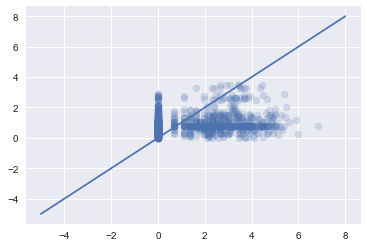

In [69]:
tree_pred_test = dtrmodel.predict(Xtree_test)
plt.scatter(y_test, tree_pred_test,alpha = 0.2)
plt.plot(np.linspace(-5,8,10000),np.linspace(-5,8,10000))
plt.figure()

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
rfmodel1 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=5, n_jobs=-1)
rfmodel1.fit(Xtree_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [72]:
rf1_test_pred = rfmodel1.predict(Xtree_test)

print(rfmodel1.score(Xtree_train,y_train))
rfmodel1.score(Xtree_test,y_test)

0.461339551666


0.11709759452326296

In [73]:
print(rfmodel1.max_depth)
print(rfmodel1.feature_importances_)

None
[ 0.37797738  0.26082625  0.          0.08250543  0.10049618  0.07629896
  0.10189581]


In [83]:
print(list(zip(Xtree.columns,rfmodel1.feature_importances_)))

[('Sch_Dist(mi)', 0.37797737777978746), ('Sch_Dur', 0.26082624513910624), ('TOD_tree', 0.0), ('ORI_rank', 0.082505426891243835), ('DES_rank', 0.10049617638186371), ('Airline_Avg_Delay', 0.076298962352095531), ('DOW_avg_delay', 0.10189581145590283)]


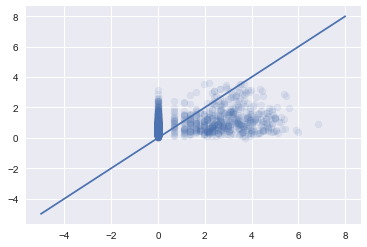

In [74]:
plt.scatter(y_test, rf1_test_pred,alpha=.1)
plt.plot(np.linspace(-5,8,1000),np.linspace(-5,8,1000))

In [75]:
rfmodel2 = RandomForestRegressor(n_estimators = 500, min_samples_leaf = 50, n_jobs=-1)
rfmodel2.fit(Xtree_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=50,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [76]:
rf2_test_pred = rfmodel2.predict(Xtree_test)
print(rfmodel2.score(Xtree_train,y_train))
rfmodel2.score(Xtree_test,y_test)

0.142941224874


0.084622005710856096

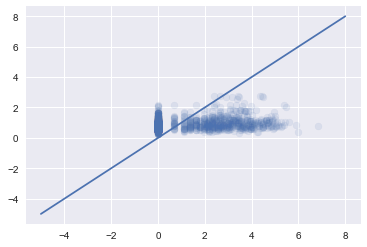

In [77]:
plt.scatter(y_test, rf2_test_pred,alpha=.1)
plt.plot(np.linspace(-5,8,1000),np.linspace(-5,8,1000))